<a href="https://colab.research.google.com/github/shubham25091998/machine_learning/blob/main/EDA_FeatureEngg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Algerian_forest_fires_dataset.csv")

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,55,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


#DataCleaning

In [ ]:
df.isnull().sum()

,0
day,1
month,2
year,2
Temperature,2
RH,2
Ws,2
Rain,2
FFMC,2
DMC,2
DC,2


In [ ]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [ ]:
# mark two regions as 0 and 1
df.loc[:122,"Region"] = 0
df.loc[122:,"Region"] = 1

df["Region"].astype(int)

,Region
0,0
1,0
2,0
3,0
4,0
...,...
242,1
243,1
244,1
245,1


In [ ]:
df = df.drop(index=[122,123])

df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [ ]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [ ]:
df.iloc[122] # index/sr no is wrong

,124
day,day
month,month
year,year
Temperature,Temperature
RH,RH
Ws,Ws
Rain,Rain
FFMC,FFMC
DMC,DMC
DC,DC


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.iloc[122] # now the sr no is fixed

,122
day,day
month,month
year,year
Temperature,Temperature
RH,RH
Ws,Ws
Rain,Rain
FFMC,FFMC
DMC,DMC
DC,DC


In [ ]:
df.isnull().sum()
df = df.dropna().reset_index(drop=True)

In [ ]:
df = df.drop(index=122)
# df.iloc[122]

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [ ]:
# fixing spaces in column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [ ]:
# day, month, year, temperature, RH, Ws can be int and after that it can be float

df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws'] ]= df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), int64(6), object(8)
memory usage: 28.6+ KB


In [ ]:
col = [name for name in df.columns if df[name].dtype == "O"]

In [ ]:
for name in col:
  if name != 'Classes':
    df[name] = df[name].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.6+ KB


In [ ]:
# delete day month and year column
df_copy = df.copy()
df = df.drop(labels = ['day', 'month', 'year'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 22.9+ KB


In [ ]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [ ]:
# # encoding
import numpy as np
df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


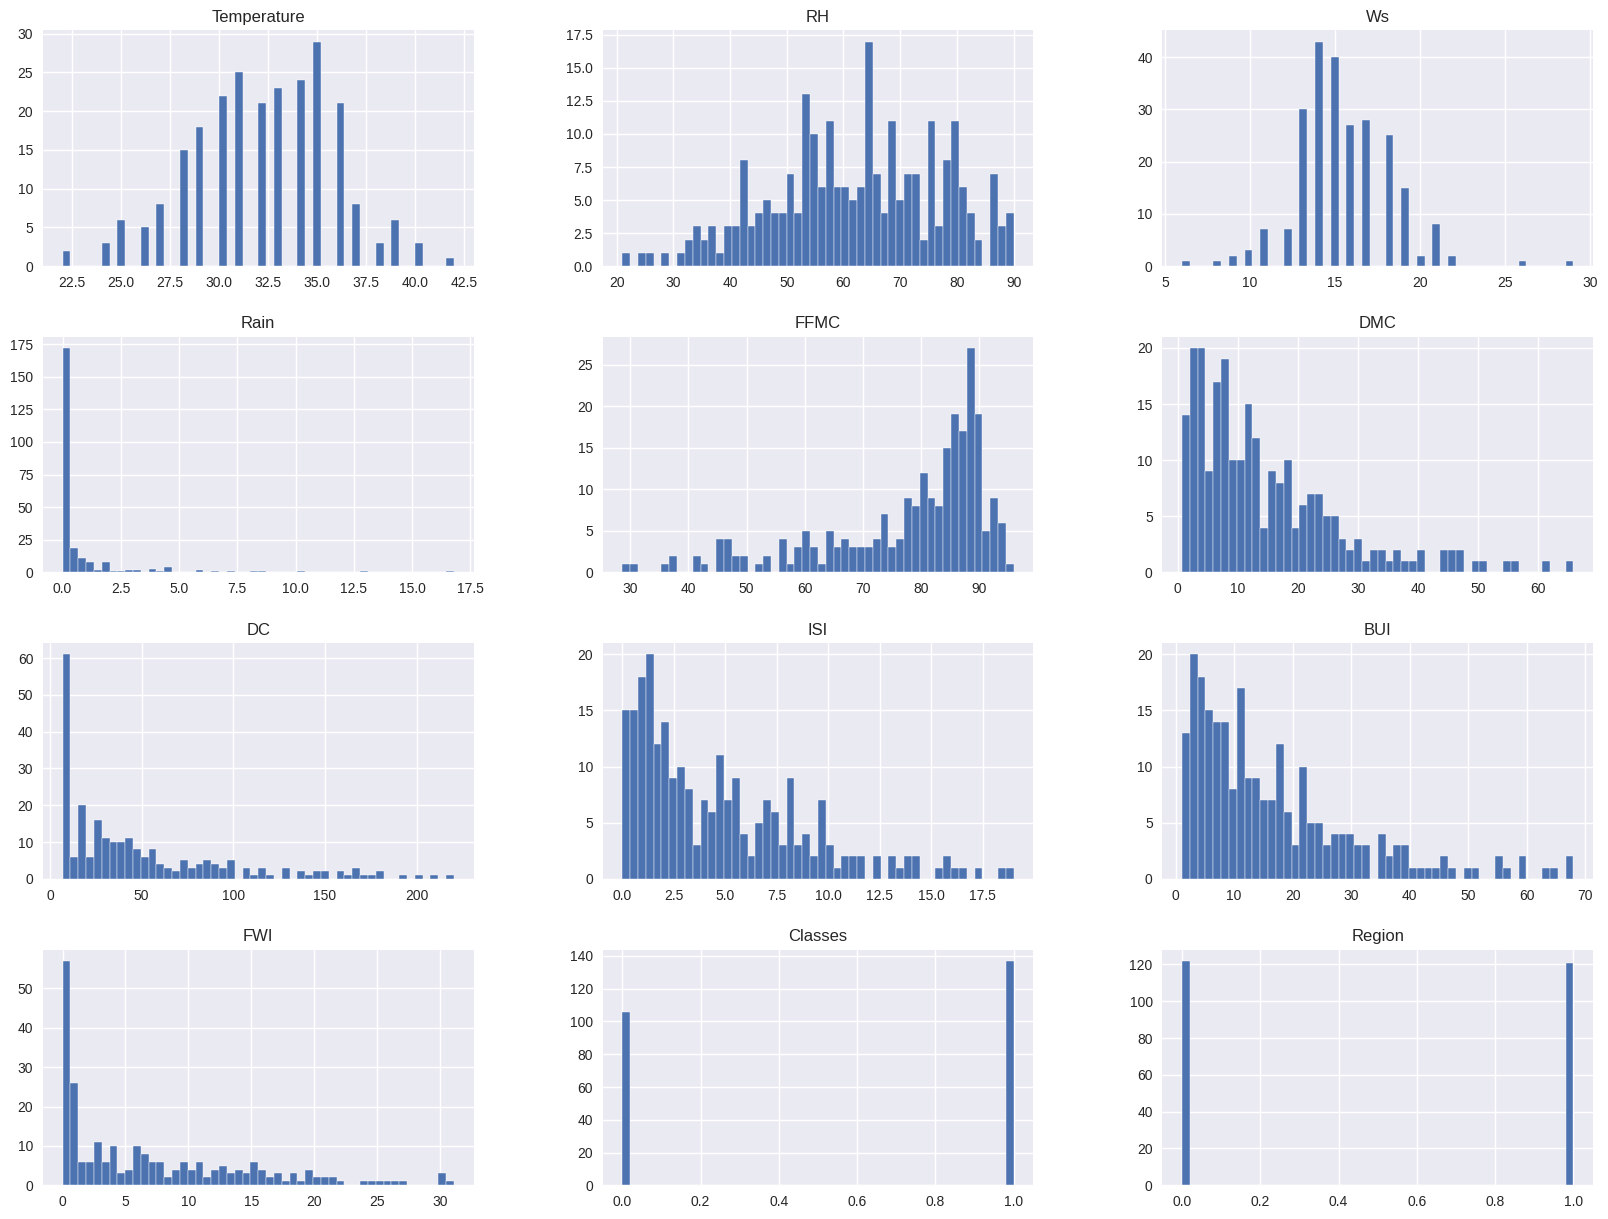

In [ ]:
# ploting data
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.available
plt.style.use('seaborn-v0_8')
df.hist(bins = 50, figsize=(20,15))
plt.show()

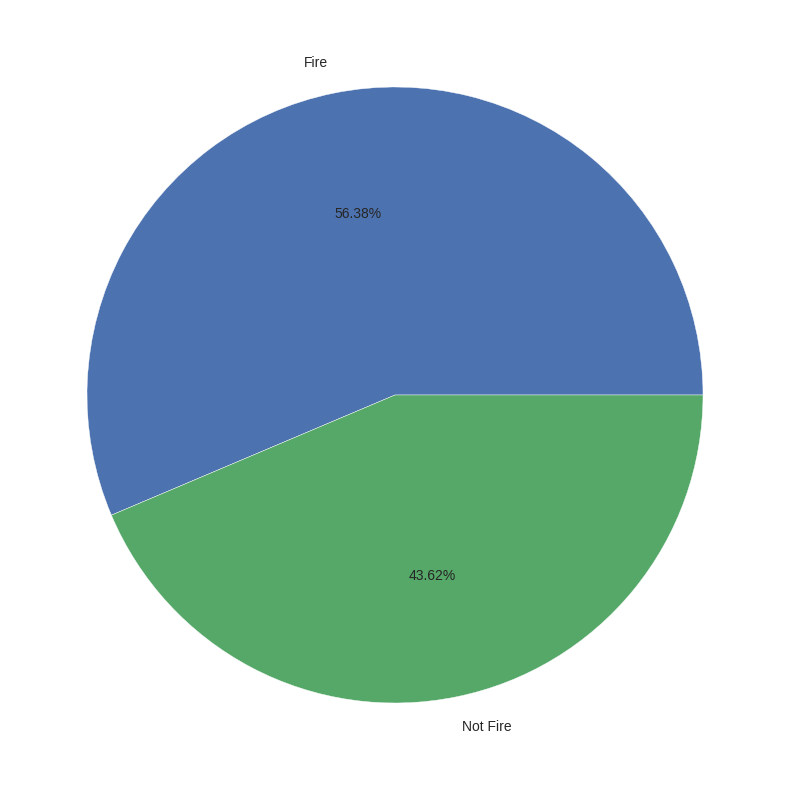

In [ ]:
# plotting a pie chart

percentages = df['Classes'].value_counts(normalize=True)*100

class_labels = ["Fire","Not Fire"]
plt.figure(figsize = (15,10))
plt.pie(percentages, labels=class_labels,autopct='%1.2f%%')
plt.show()

In [ ]:
#co-relation
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

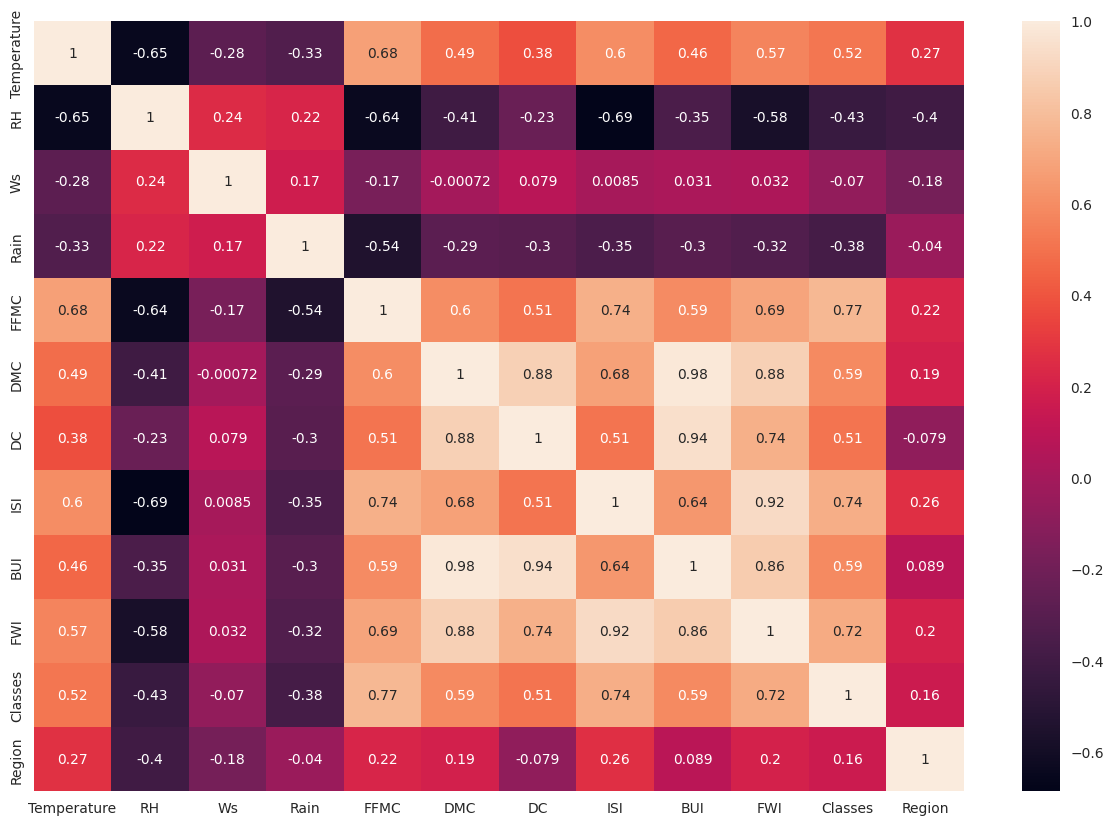

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='FWI'>

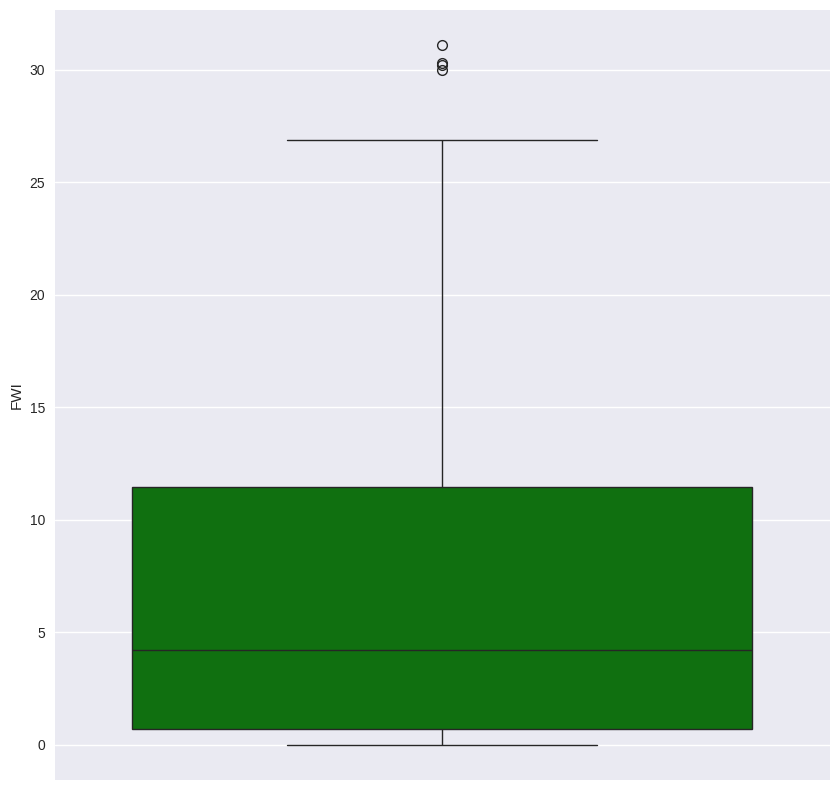

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(df['FWI'], orient="Vertical", color = 'Green')

In [ ]:
df_copy

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1.0
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1.0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


<Axes: xlabel='month', ylabel='count'>

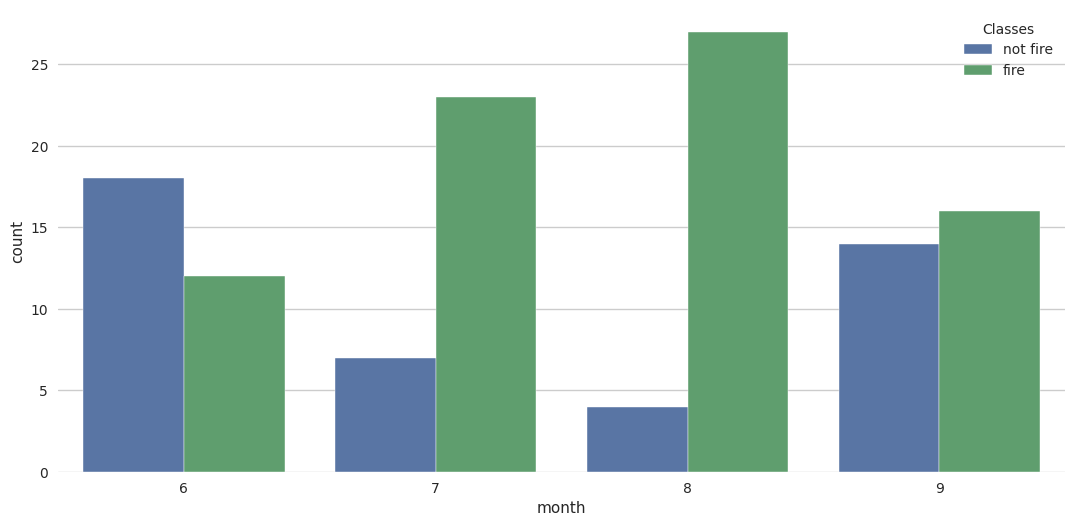

In [ ]:
# plotting data month wise
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 'not fire','fire')
month_data = df_copy.loc[df['Region'] == 1]

plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(x="month", hue='Classes',data = month_data)

# Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
def get_correlated_column(data, threshold):
  co_related_column = set()
  corr_matrix = data.corr()
  for i in corr_matrix.columns :
    for j in corr_matrix.index:
      if i != j and corr_matrix[i][j] > threshold:
        co_related_column.add(i)
  return co_related_column

redundant_col = get_correlated_column(df, 0.95)

In [ ]:
df.drop(redundant_col, axis = 1, inplace=True)

In [ ]:
# train, test = train_test_split(df,test_size=0.2, random_state=42)
df_copy = df.copy()
y = df_copy['FWI']
df_copy.drop('FWI', axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(df_copy, y, test_size = 0.2, random_state=42)

In [ ]:
#Feature scaling and transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit(X_test)